In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

df = pd.read_csv("train.csv")

In [255]:
print(len(df))
df.head()

240000


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [257]:
#NUMERICOS ENTEROS QUE ERAN INNECESARIAMENTE FLOAT
#------------------------------------------------#

#NUMERICOS QUE SOLO SON CERO O UNO
df['usosmultiples'] = df['usosmultiples'].astype('bool')
df['piscina'] = df['piscina'].astype('bool')
df['gimnasio'] = df['gimnasio'].astype('bool')
df['escuelascercanas'] = df['escuelascercanas'].astype('bool')
df['centroscomercialescercanos'] = df['centroscomercialescercanos'].astype('bool')


#FECHA DE PUBLICACION A DATETIME
df['fecha'] = pd.to_datetime(df['fecha'])


# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [258]:
# A estos hay que limpiarles los inf y los NaN antes de convertir a int

#df['antiguedad'] = df.antiguedad.astype('int64')
#df['garages'] = df.garages.astype('int64')
#df['habitaciones'] = df.habitaciones.astype('int64')
#df['metrostotales'] = df.metrostotales.astype('int64')
#df['metroscubiertos'] = df.metroscubiertos.astype('int64')
#df['idzona'] = df.idzona.astype('int64')

In [259]:
df['precio'] = df.precio/1000000
df

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2.273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3.600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1.200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1.150000
5,126147,departamento en venta taxqueña,"amplio departamento, estancia de sala y comedo...",Apartamento,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,5.0,2.0,1.0,...,23650.0,19.300612,-99.148475,2014-03-18,False,False,False,False,True,1.100000
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23,False,False,False,False,False,1.150000
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20,False,False,False,False,False,4.200000
8,44962,pre- venta preciosos depas 2 recamaras con sub...,<p>pre-venta de preciosos departamento ecologi...,Apartamento,BUENAVISTA DEPTOS CON SUBSIDIO,Villa de Alvarez,Colima,1.0,2.0,1.0,...,9010.0,NaN,NaN,2014-01-06,False,False,False,True,True,0.310000
9,134537,terreno,"terreno de 5.500m2 bardeado, uso de suelo h-20...",Terreno,Av. Morelos,Ixtapaluca,Edo. de México,NaN,NaN,NaN,...,59171.0,19.316000,-98.887000,2016-12-22,False,False,False,False,False,6.200000


In [260]:
df.groupby(['provincia']).mean().head()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
provincia,,,,,,,,,,,,,,,,
Aguascalientes,154959.258414,7.524580,3.096447,1.541806,2.120382,176.184227,173.284826,43294.975680,21.831435,-102.195316,0.049059,0.062750,0.095836,0.561323,0.487165,1.477189
Baja California Norte,148924.613354,5.788405,2.580032,1.613046,1.365226,94.006675,128.017080,30960.859136,32.400529,-116.573708,0.012733,0.010559,0.016770,0.471118,0.472050,0.767442
Baja California Sur,150529.557647,2.459770,2.633838,1.684280,1.606195,113.391197,182.840849,27136.484101,23.635485,-109.848963,0.006471,0.002941,0.042941,0.284118,0.135294,1.216453
Campeche,140901.319392,3.914573,2.835749,0.944444,1.963351,164.229592,204.650655,20952.557522,19.022109,-90.423348,0.015209,0.003802,0.026616,0.277567,0.224335,1.570918
Chiapas,149548.004440,5.412871,3.031926,1.324211,2.206164,175.109879,179.228690,20687.711882,16.692183,-93.055999,0.029307,0.007105,0.028419,0.333925,0.207815,1.924126


(0.3, 6)

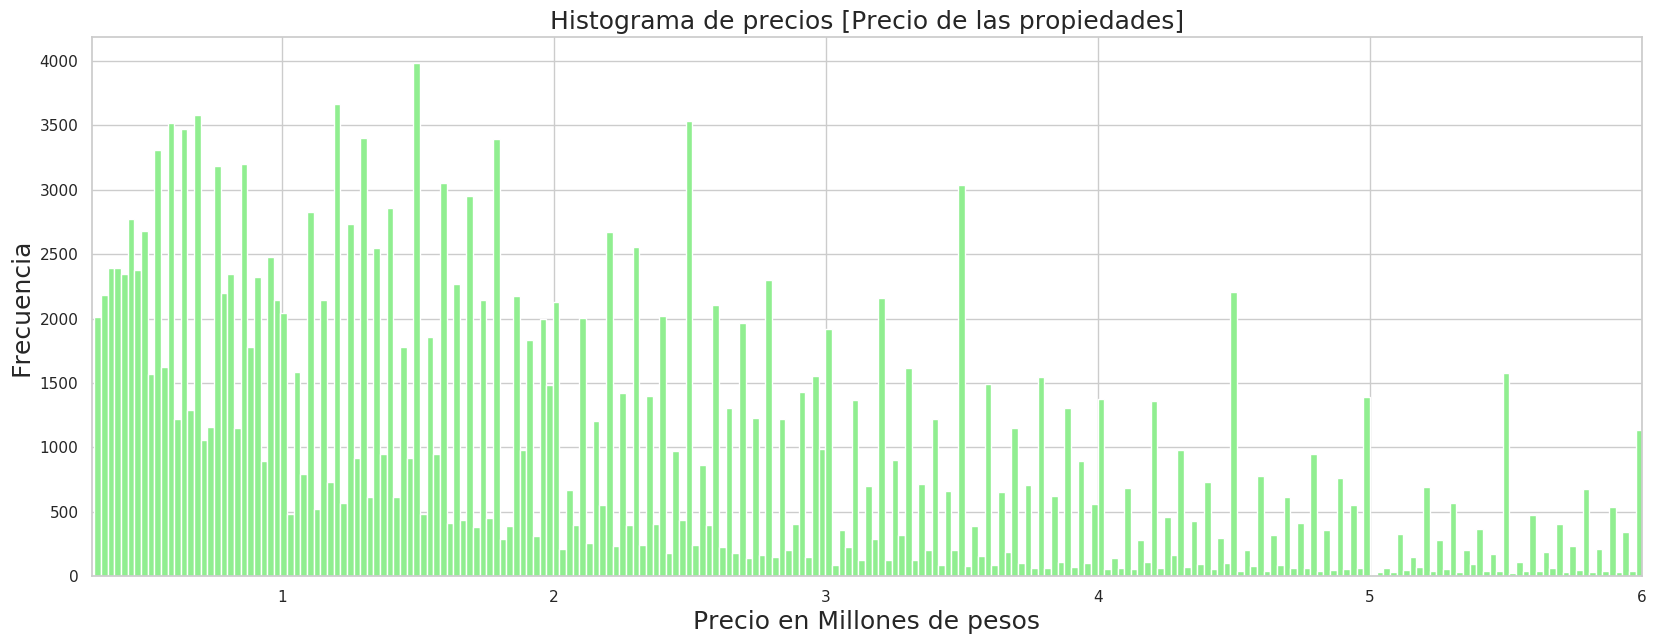

In [261]:
g = df["precio"].plot.hist(bins=500, color='lightgreen', figsize=(20, 7))
g.set_title("Histograma de precios [Precio de las propiedades]", fontsize=18)
g.set_xlabel("Precio en Millones de pesos",fontsize=18)
g.set_ylabel("Frecuencia", fontsize=18)
plt.xlim(0.3, 6)

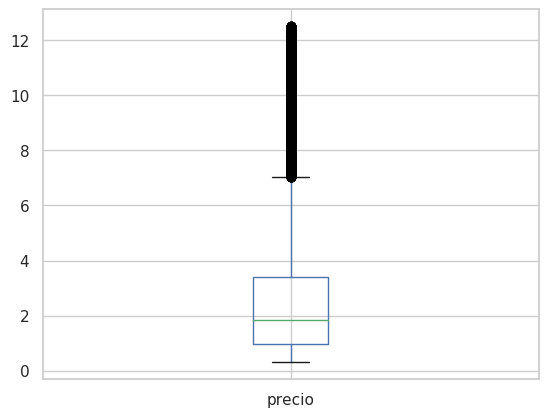

In [262]:
df['precio'].plot(kind='box');

# Precio promedio por tipo de propiedad

In [263]:
prop = df.dropna(subset=['tipodepropiedad'])
prop = prop.groupby('tipodepropiedad').filter(lambda x : len(x)>5000)

In [264]:
print(len(prop))
prop.head()

228300


,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2.273
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3.600
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1.200
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1.150


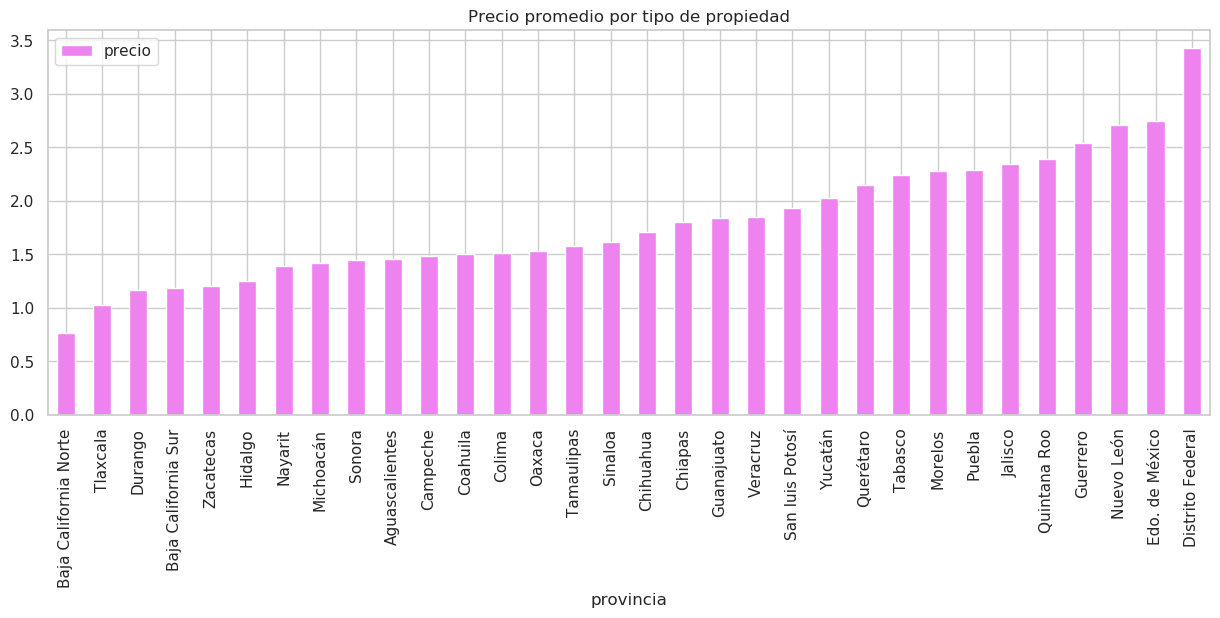

In [265]:
prop.groupby('provincia').agg({'precio': 'mean'})\
    .sort_values(by=['precio'])\
    .plot(kind='bar', figsize=(15, 5), rot='vertical', title="Precio promedio por tipo de propiedad", color='violet');

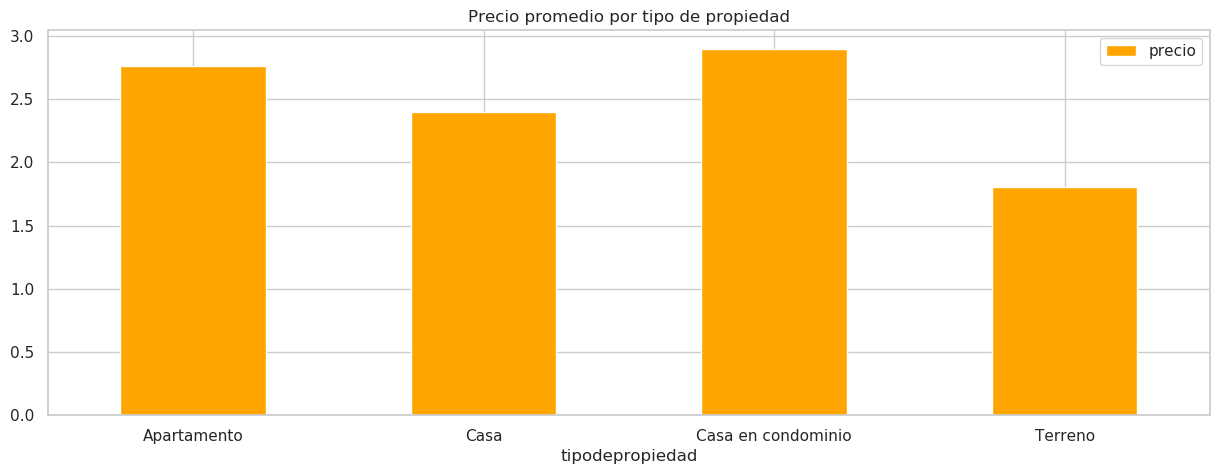

In [266]:
prop.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad", color='orange');

### En Mexico DF Y Baja California Norte

In [267]:
tasaTipo = prop.groupby(['tipodepropiedad', 'provincia']).agg({'precio': 'mean'})
tasaTipo = tasaTipo.unstack(fill_value=0)
tasaTipo

precio                                            \
provincia          Aguascalientes Baja California Norte Baja California Sur   
tipodepropiedad                                                               
Apartamento              1.983935              1.031354            1.387354   
Casa                     1.411556              0.749331            1.165894   
Casa en condominio       1.842735              0.705129            2.007090   
Terreno                  0.980819              0.532430            0.981975   

                                                                      \
provincia           Campeche   Chiapas Chihuahua  Coahuila    Colima   
tipodepropiedad                                                        
Apartamento         2.755000  0.952988  2.348672  1.366500  2.492713   
Casa                1.460351  1.914576  1.750869  1.528582  1.416699   
Casa en condominio  1.827182  1.653721  0.704722  1.187650  2.345725   
Terreno             1.093561  1.232126  0.997731  1.035559  0.666627   

                                               ...               \
provincia          Distrito Federal   Durango  ... Quintana Roo   
tipodepropiedad                                ...                
Apartamento                2.919084  1.052362  ...     2.711399   
Casa                       4.037017  1.185172  ...     2.333655   
Casa en condominio         4.811713  1.733281  ...     2.508516   
Terreno                    4.066719  0.650260  ...     1.183473   

                                                                             \
provincia          San luis Potosí   Sinaloa    Sonora   Tabasco Tamaulipas   
tipodepropiedad                                                               
Apartamento               1.671470  1.729476  1.685532  1.785455   1.017654   
Casa                      2.032427  1.643923  1.459925  2.343634   1.686433   
Casa en condominio        2.266716  1.800260  0.900301  3.365778   1.282397   
Terreno                   1.360701  0.961073  0.852976  1.400985   1.005246   

                                                            
provincia           Tlaxcala  Veracruz   Yucatán Zacatecas  
tipodepropiedad                                             
Apartamento         0.477258  1.940036  2.336429  0.480000  
Casa                1.044962  1.921550  1.992796  1.229582  
Casa en condominio  0.633147  1.488363  2.633705  0.884333  
Terreno             1.360011  1.066838  1.280037  1.038187  

[4 rows x 32 columns]

Text(0, 0.5, 'Precio promedio en millones de pesos')

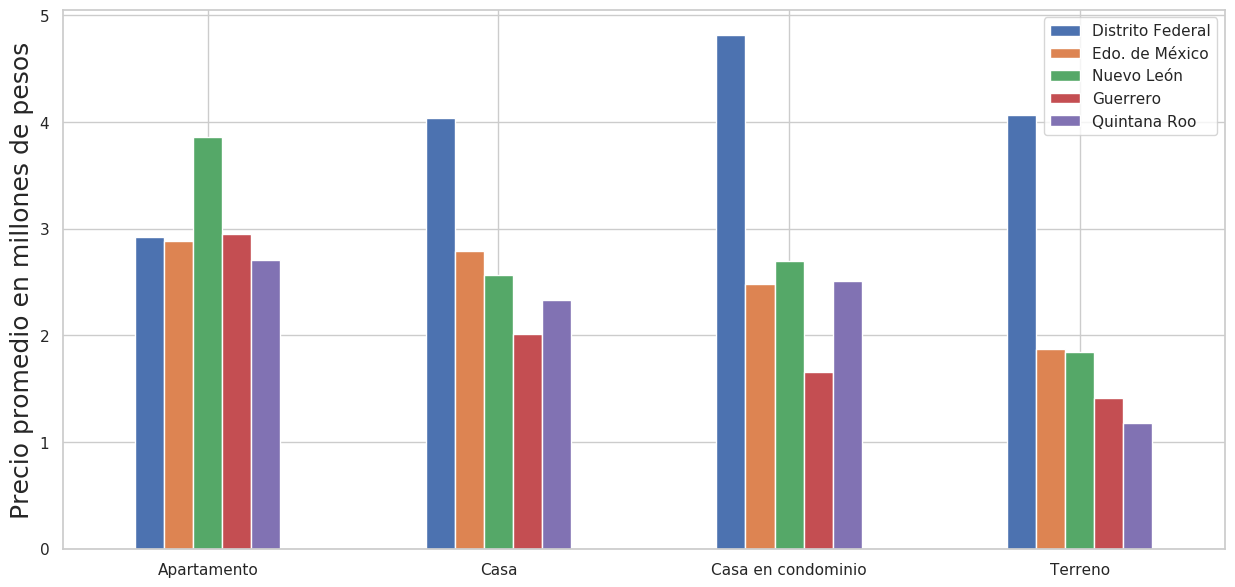

In [268]:
pres_df = tasaTipo.precio["Distrito Federal"].tolist()
pres_edoMe = tasaTipo.precio['Edo. de México'].tolist()
pres_nueLeo = tasaTipo.precio['Nuevo León'].tolist()
pres_Guer = tasaTipo.precio['Guerrero'].tolist()
pres_Quintana_Roo = tasaTipo.precio['Quintana Roo'].tolist()

#Districto Federal; Edo. de México; Nuevo León; Guerrero; Quintana Roo

index = labels


presCat = pd.DataFrame({'Distrito Federal': pres_df,
                        'Edo. de México': pres_edoMe,
                        'Nuevo León': pres_nueLeo,
                        'Guerrero': pres_Guer,
                        'Quintana Roo': pres_Quintana_Roo}, index=index)
ax = presCat.plot.bar(rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)

Text(0, 0.5, 'Precio promedio en millones de pesos')

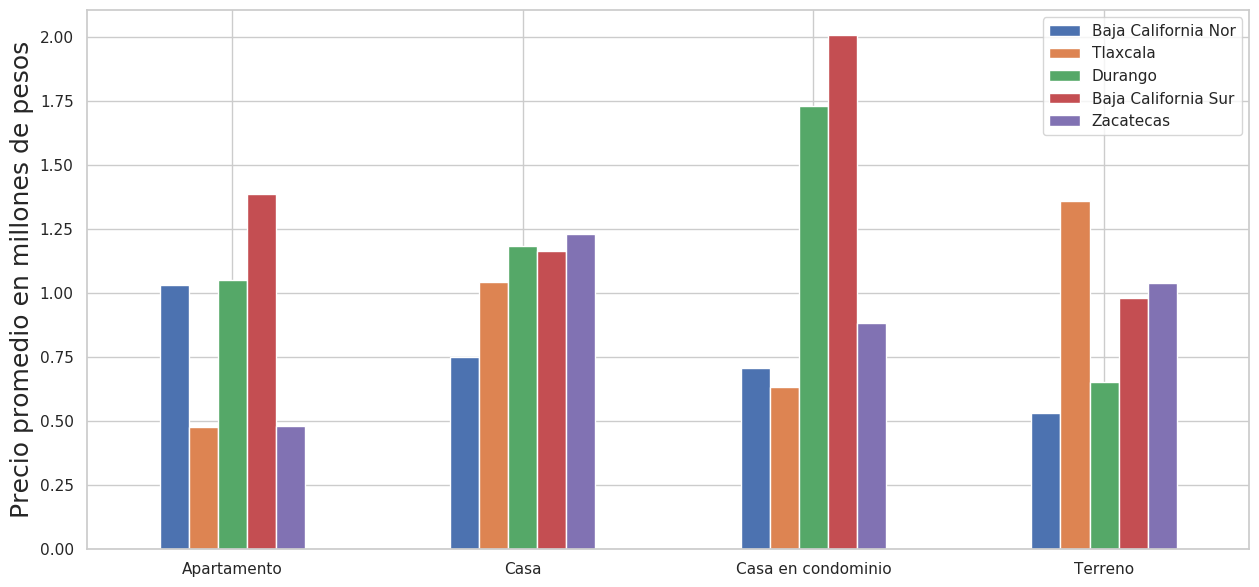

In [269]:
pres_BajaCalNor = tasaTipo.precio["Baja California Norte"].tolist()
pres_Tlax = tasaTipo.precio['Tlaxcala'].tolist()
pres_Durabgo = tasaTipo.precio['Durango'].tolist()
pres_BajaCalSur = tasaTipo.precio['Baja California Sur'].tolist()
pres_Zacatecas = tasaTipo.precio['Zacatecas'].tolist()

#Baja California Norte; Tlaxcala; Durango; Baja California Sur; Zacatecas

index = labels


presCat = pd.DataFrame({'Baja California Nor': pres_BajaCalNor,
                        'Tlaxcala': pres_Tlax,
                        'Durango': pres_Durabgo,
                        'Baja California Sur': pres_BajaCalSur,
                        'Zacatecas': pres_Zacatecas}, index=index)
ax = presCat.plot.bar(rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)

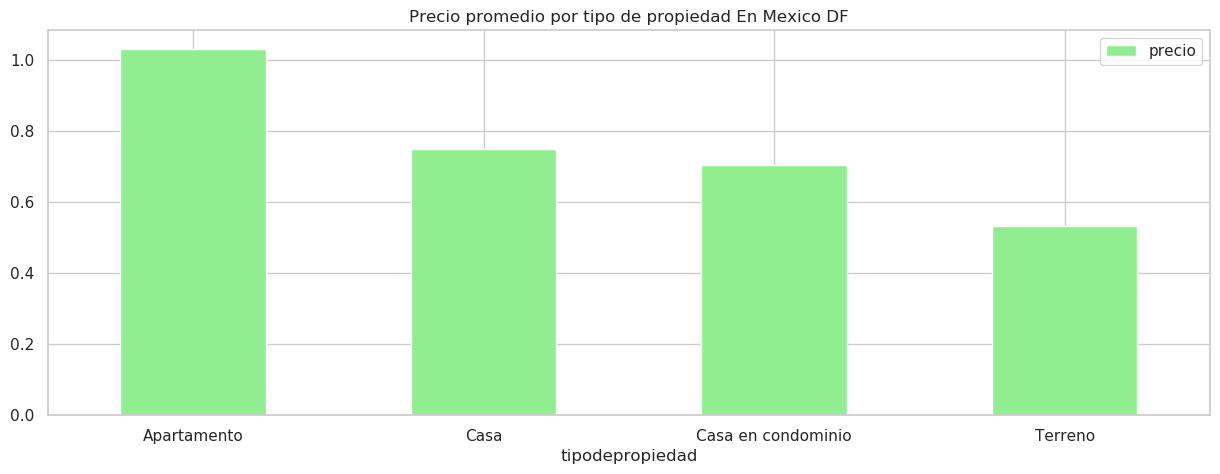

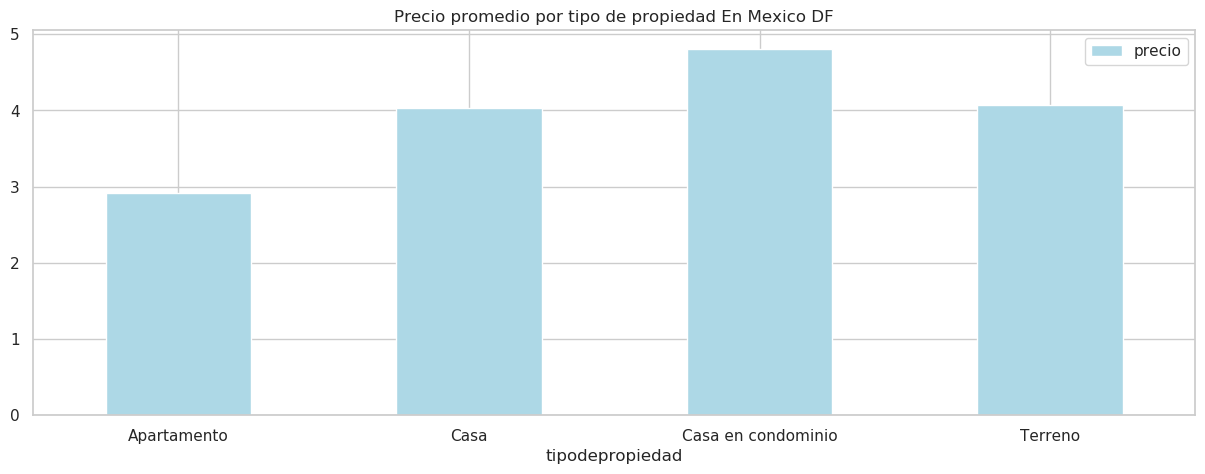

In [270]:
prop_df = prop[prop['provincia'] == 'Distrito Federal']
prop_bajCal = prop[prop['provincia'] == 'Baja California Norte']

prop_bajCal.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad En Mexico DF", color='lightgreen');

prop_df.groupby('tipodepropiedad').agg({'precio': 'mean'})\
    .plot(kind='bar', figsize=(15, 5), rot=0, title="Precio promedio por tipo de propiedad En Mexico DF", color='lightblue');

In [271]:
labels = prop["tipodepropiedad"].tolist()
labels = list( dict.fromkeys(labels) )
labels.sort()
labels

['Apartamento', 'Casa', 'Casa en condominio', 'Terreno']

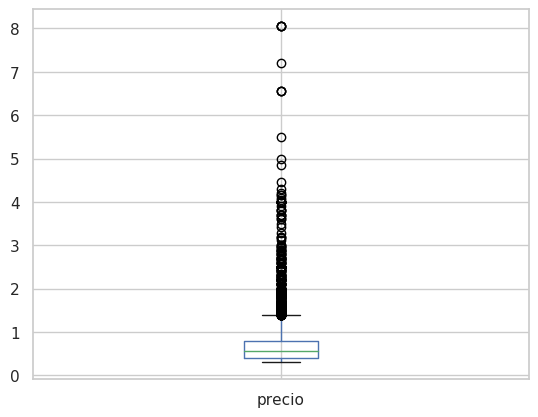

In [272]:
prop_bajCal['precio'].plot(kind='box');

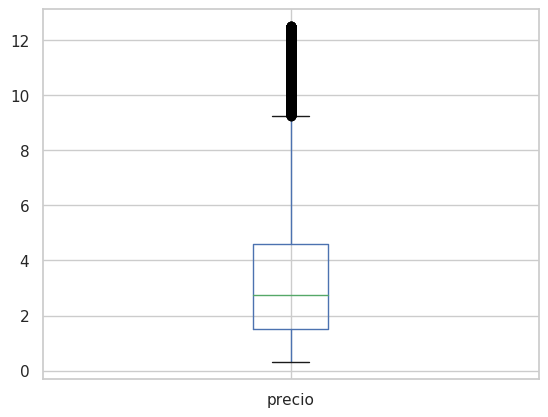

In [273]:
prop_df['precio'].plot(kind='box');

Text(0, 0.5, 'Precio promedio en millones de pesos')

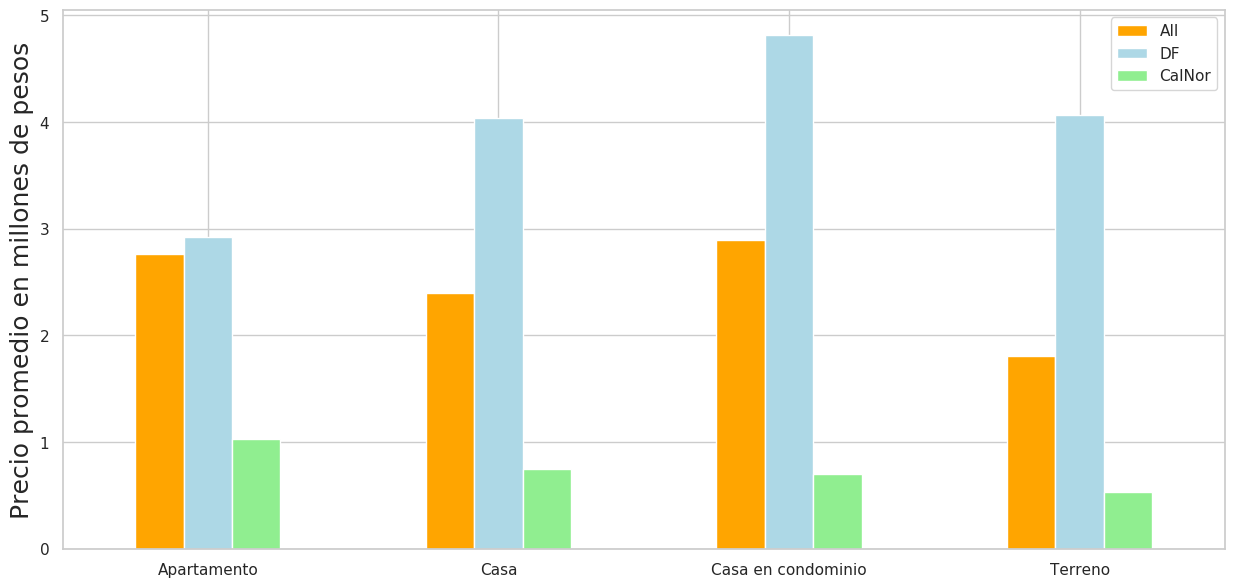

In [274]:
index = labels

pres_all = prop.groupby('tipodepropiedad').agg({'precio': 'mean'})["precio"].tolist()
pres_df = prop_df.groupby('tipodepropiedad').agg({'precio': 'mean'})["precio"].tolist()
pres_CalNor = prop_bajCal.groupby('tipodepropiedad').agg({'precio': 'mean'})["precio"].tolist()


presCat = pd.DataFrame({'All': pres_all,
                        'DF': pres_df,
                        'CalNor': pres_CalNor}, index=index)
ax = presCat.plot.bar(color=['orange', 'lightblue', 'lightgreen'], rot=0, figsize=(15, 7))
ax.set_ylabel("Precio promedio en millones de pesos", fontsize=18)

In [290]:
metros = df.dropna(subset=['metroscubiertos'])
metros = metros.dropna(subset=['metrostotales'])
metros.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,0.000000,0.000000,2015-08-23,False,False,False,False,False,2.273
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3.600
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1.200
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,0.000000,0.000000,2016-06-07,False,False,False,False,False,1.150


In [277]:
#x = metros['metroscubiertos'].tolist()
#y = metros['metrostotales'].tolist()
#z = metros['precio'].tolist()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


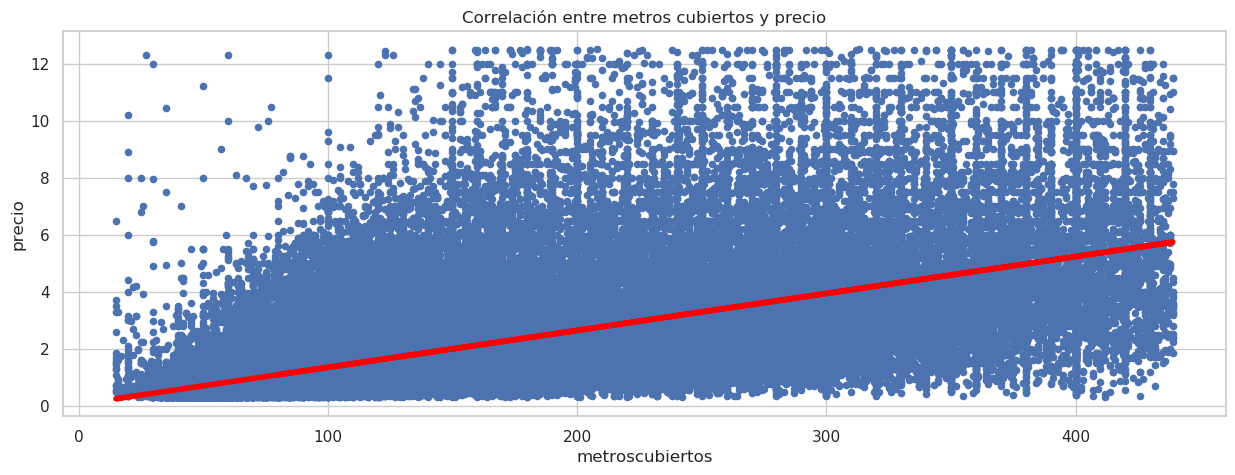

In [278]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metroscubiertos'

# Scatter plot
metros.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = metros[column]
y = metros['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), color='red', linewidth=4);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


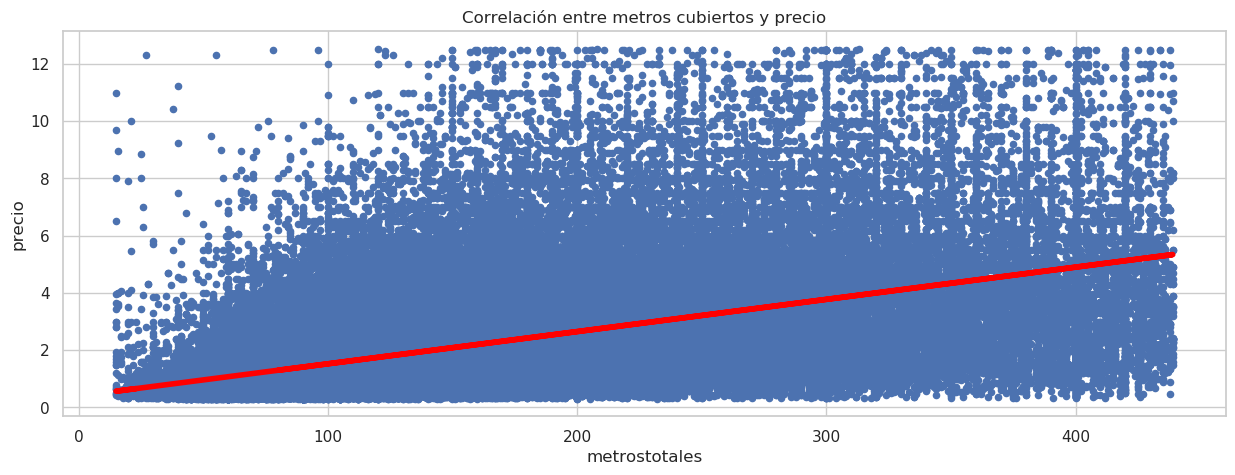

In [279]:
# Correlacion entre precio y metros cubiertos: descripción gráfica
column = 'metrostotales'

# Scatter plot
metros.plot.scatter(x=column, y='precio', figsize=(15, 5), title="Correlación entre metros cubiertos y precio")
plt.ticklabel_format(style = 'plain')

# Best-fit lineal
x = metros[column]
y = metros['precio']
f = np.poly1d(np.polyfit(x, y, deg=1))  
plt.plot(x.unique(), f(x.unique()), color='red', linewidth=4);

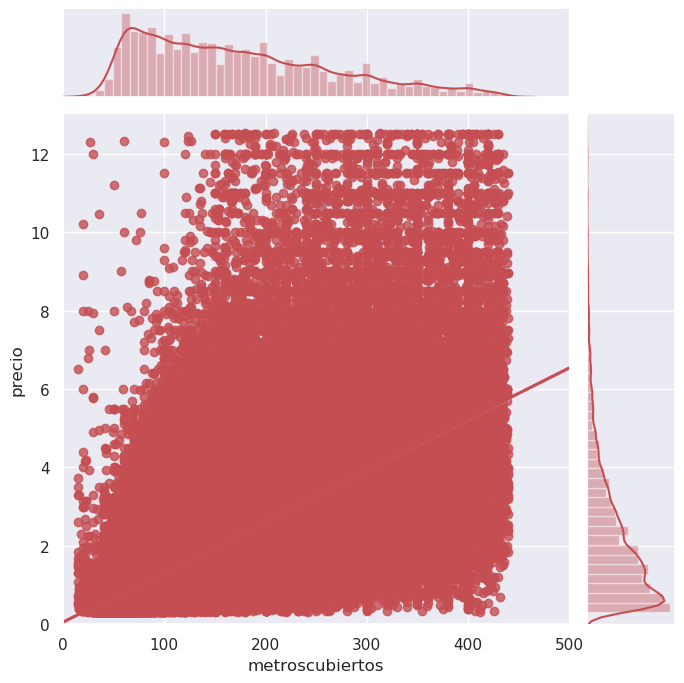

In [287]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metroscubiertos", "precio", data=metros, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="r", height=7)

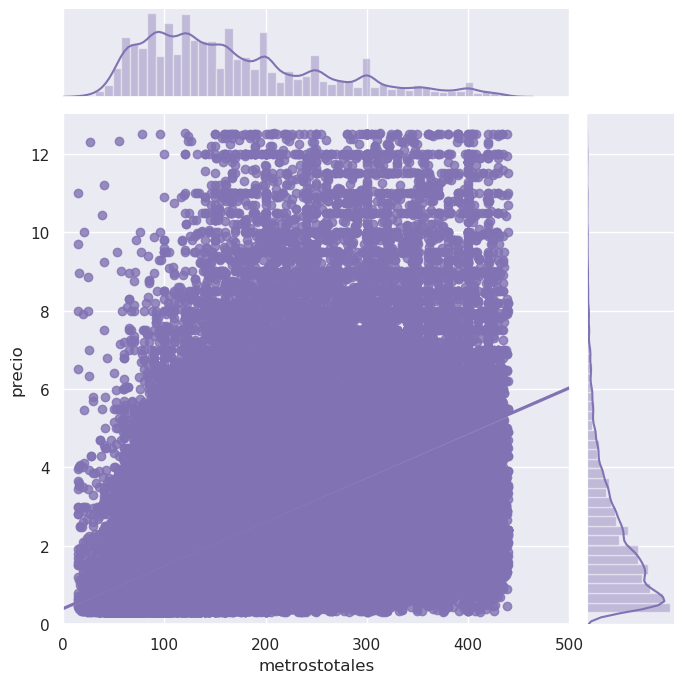

In [288]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metrostotales", "precio", data=metros, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="m", height=7)

In [291]:
metros_casas = metros[metros.tipodepropiedad == 'Casa']
metros_casas

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,0.000000,0.000000,2015-10-17,False,False,False,False,False,1.200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,0.650000
6,139233,de oportunidad casa en san lorenzo,"ubicada en esquina, pertenece san lorenzo agen...",Casa,NaN,Oaxaca de Juárez,Oaxaca,NaN,3.0,1.0,...,73510.0,17.143504,-96.803504,2016-02-23,False,False,False,False,False,1.150000
7,5013,casa emilia en venta en selvamar playa del carmen,casa emilia en venta playa del carmenfracciona...,Casa,condominio el trebol,Playa del Carmen,Quintana Roo,2.0,4.0,2.0,...,130510.0,20.672612,-87.037968,2016-10-20,False,False,False,False,False,4.200000
12,47890,hermosa casa en zibata queretaro 170m²,<p><strong>casa </strong>en venta en fracciona...,Casa,"Pitahayas 2 - 58, Zibata",Querétaro,Querétaro,0.0,3.0,2.0,...,83666.0,20.682878,-100.317503,2013-08-12,False,True,False,True,True,1.500000
13,130216,casa matias romero - sión bancaria,flamante casa habitación en condominio horizon...,Casa,"MATIAS ROMERO, COLONIA DEL VALLE",Benito Juárez,Distrito Federal,20.0,NaN,0.0,...,50003995.0,19.374895,-99.149519,2015-03-31,False,False,False,False,False,3.000000
14,181436,casa en venta en valle real,pre venta de residencia en la toscana con exce...,Casa,NaN,Zapopan,Jalisco,NaN,NaN,2.0,...,47732.0,20.729601,-103.431993,2014-11-25,False,False,False,False,False,5.300000
15,201923,casa en venta lomas verdes naucalpan,"<p>casa en dos niveles, 3 recámaras la princip...",Casa,NaN,Naucalpan de Juárez,Edo. de México,NaN,3.0,2.0,...,NaN,19.516583,-99.256028,2015-01-13,False,False,False,False,False,3.650000
16,283945,preciosa casa en cumbres del lago \t,<p>clave: vcln2450 fecha de actualizaci&oacute...,Casa,"CUMBRES DEL LAGO JURIQUILLA, QUERETARO, MEXICO",Querétaro,Querétaro,0.0,3.0,2.0,...,84338.0,20.708760,-100.459303,2013-03-06,False,False,False,True,True,2.450000
19,87655,NaN,-- rcv151104-lv-27 -- linda casa con area d...,Casa,SENDA CELESTIAL 10,Querétaro,Querétaro,0.0,3.0,2.0,...,339455.0,0.000000,0.000000,2016-01-15,False,False,False,False,False,1.850000


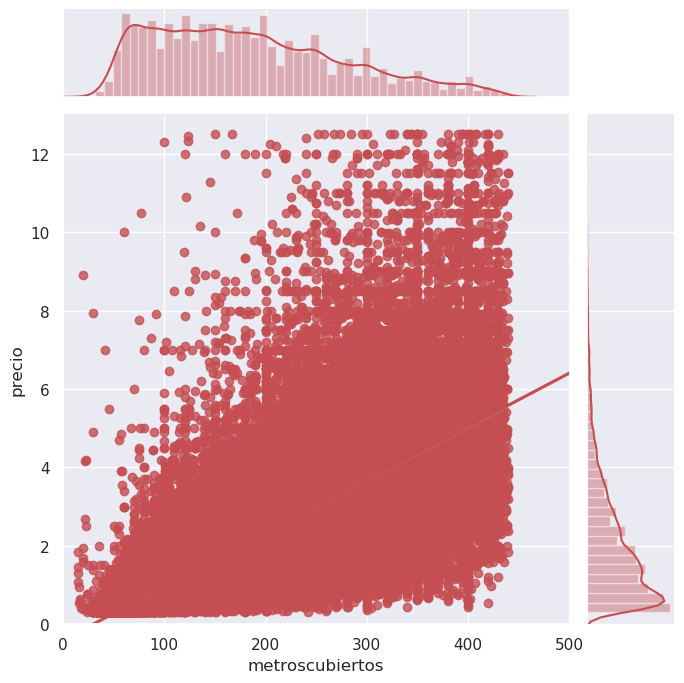

In [293]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metroscubiertos", "precio", data=metros_casas, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="r", height=7)

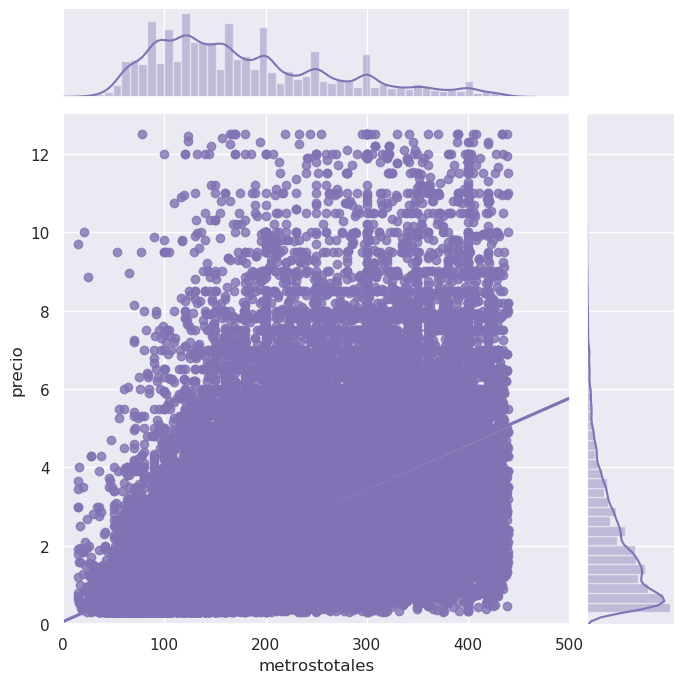

In [292]:
import seaborn as sns
sns.set(style="darkgrid")

g = sns.jointplot("metrostotales", "precio", data=metros_casas, kind="reg",
                  xlim=(0, 500), ylim=(0, 13), color="m", height=7)

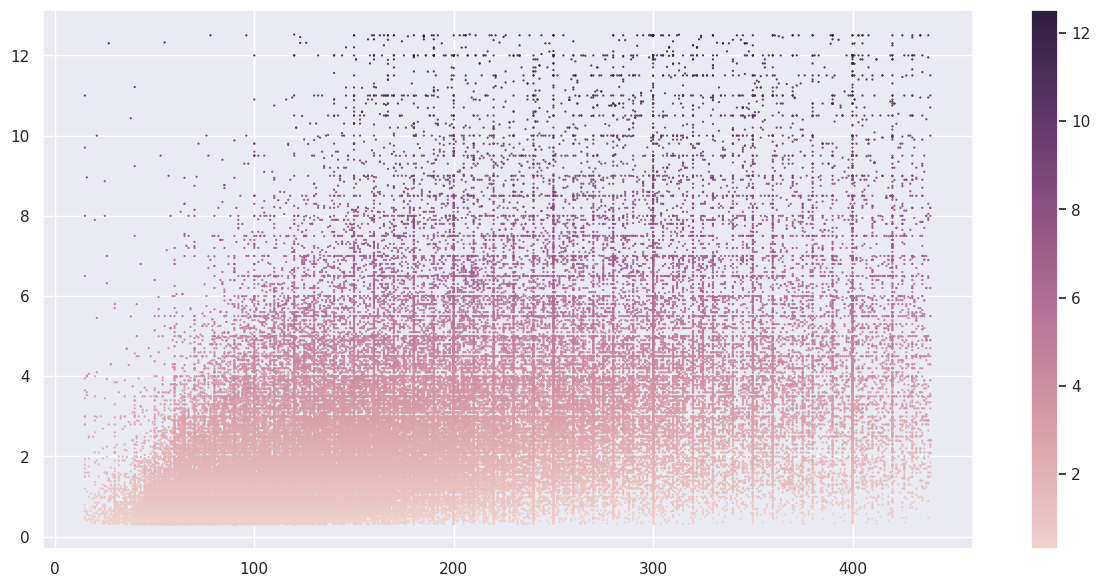

In [281]:
##sns.cubehelix_palette(as_cmap=True)
cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(15, 7))
points = ax.scatter(x, y, c=z, s=0.3, cmap=cmap)
f.colorbar(points)

In [282]:
#Vemos cuántos NaN hay por columna, sabiendo que el total es 240000
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

In [283]:
#Reemplazo los NaN por 0
df.loc[(df['lat']).isnull(),['lat']]=0
df.loc[(df['lng']).isnull(),['lng']]=0

In [284]:
df['lat'].isnull().sum()

0

In [285]:
df['lng'].isnull().sum()

0

In [286]:
df['lat'].value_counts()

0.000000     123936
23.063781         8
23.054936         7
19.314000         6
19.392000         6
19.391000         6
19.617000         6
19.393000         6
19.358000         6
19.489000         6
23.053672         6
19.558000         6
19.457000         6
19.410000         6
32.454473         5
23.068835         5
19.300000         5
19.332000         5
19.503000         5
19.369000         5
19.485000         5
19.388000         5
19.344000         5
19.350000         5
19.387000         5
19.437000         5
19.397000         5
19.478000         5
19.444000         5
19.494000         5
              ...  
17.094446         1
20.997915         1
19.591669         1
19.417518         1
19.727337         1
19.476194         1
19.359454         1
19.287115         1
18.987497         1
19.495689         1
20.662757         1
19.492759         1
20.743466         1
21.160287         1
19.433077         1
19.359921         1
19.361805         1
20.642669         1
24.009796         1


In [35]:
df['lng'].value_counts()

 0.000000      123937
-99.225000         12
-99.218984          9
-99.139000          8
-99.213000          8
-99.230000          8
-99.143540          7
-99.156000          7
-99.125000          7
-99.191000          7
-99.227000          7
-99.177446          7
-99.234000          7
-99.200000          7
-99.144000          7
-99.183676          7
-99.163000          7
-99.175000          6
-99.171909          6
-99.055727          6
-99.153000          6
-99.195000          6
-99.202366          6
-99.133163          6
-99.170000          6
-99.258000          6
-99.226000          6
-99.165000          6
-99.211000          6
-99.161000          6
                ...  
-100.976336         1
-103.439241         1
-103.464754         1
-96.191890          1
-99.303276          1
-116.761322         1
-106.117890         1
-99.007759          1
-98.941038          1
-100.369562         1
-102.311859         1
-99.156190          1
-99.136433          1
-100.102952         1
-100.42845

In [36]:
#Ahora cambio el tipo de dato de las columnas 'lat' y 'lng'
df['lat'] = df['lat'].astype(np.float32)
df['lng'] = df['lng'].astype(np.float32)

In [57]:
df['titulo'].value_counts()

casa en venta                                                                                           468
departamento en venta                                                                                   289
casa en venta en chihuahua                                                                              268
casa en venta en querétaro                                                                              238
departamento en venta en benito juárez                                                                  221
departamento en venta en miguel hidalgo                                                                 177
casa en venta en mérida                                                                                 167
casa en venta                                                                                           132
casa en venta en torreón                                                                                119
casa en venta en monterrey  

In [58]:
#Elimino los NaN
df.loc[(df['titulo']).isnull(), ['titulo']] = ''
df['titulo'] = df['titulo'].astype(str)

In [60]:
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [66]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['banos']).isnull(), ['banos']] = 0
df['banos'] = df['banos'].astype('category')

In [68]:
df['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [69]:
#Lo paso a tipo category porque tenemos 4 valores distintos 
df.loc[(df['garages']).isnull(), ['garages']] = 0
df['garages'] = df['garages'].astype('category')

In [70]:
df['direccion'].value_counts()

-                                                               660
.                                                               476
1                                                               212
Calle                                                           194
Norte de Mérida                                                 136
x #x                                                            122
0                                                               113
domicilio conocido                                              105
Calle 18 No.344 x 11 y 13 Col. Camara de Comercio Norte          94
calle                                                            94
Juriquilla                                                       84
El Refugio                                                       78
x                                                                77
Metepec                                                          77
CENTRO                                          

In [77]:
#Limpio las direcciones que no son calles

df.loc[(df['direccion']).isnull(), ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'S/N', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Sin nombre', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '0', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '--', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '...', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '-', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '.', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x #x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'x', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'Calle', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == '1', ['direccion']] = 'S/D'
df.loc[(df['direccion']) == 'X', ['direccion']] = 'S/D'

In [76]:
df['direccion'] = df['direccion'].astype('str')

In [ ]:
ax = df.plot.bar(x='tipodepropiedad', y='precio', rot=0)